In [30]:
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
# target = "target_close"
# target = "close_percent_change_1"
target = "up_down_close_1"

In [32]:
df = pd.read_parquet("../data/dataset.parquet")

In [33]:
def normalize_column(data: pd.DataFrame, column: str | list) -> pd.DataFrame:
    if isinstance(column, str):
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    elif isinstance(column, list):
        for col in column:
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

In [34]:
def normalize_series(data: pd.Series) -> pd.Series:
    return (data - data.min()) / (data.max() - data.min())

In [35]:
df.filter(like="splits")

,splits_event_value,splits_event_name,splits_event_sentiment,splits_event_decay,is_nan_splits_event_value,is_nan_splits_event_sentiment
0,0.0,None,0.0,NaN,0,0
1,0.0,None,0.0,NaN,0,0
2,0.0,None,0.0,NaN,0,0
3,0.0,None,0.0,NaN,0,0
4,0.0,None,0.0,NaN,0,0
...,...,...,...,...,...,...
5028,4.0,splits,1.0,4.310223e-23,1,1
5029,4.0,splits,1.0,4.094712e-23,1,1
5030,4.0,splits,1.0,3.889976e-23,1,1
5031,4.0,splits,1.0,3.695477e-23,1,1


In [36]:
# columns to drop "dividends"
df = df.drop(columns=["dividends_event_name", "splits_event_name"])


In [37]:
# # Matplotlib Graphs
# plt.figure(figsize=(24, 18))

# # Correlation Matrix
# corrilations = df.corr()
# sns.heatmap(corrilations, annot=False, cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()


In [38]:
list(df.columns)

['date',
 'open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'up_down_close_1',
 'volitility_open_7',
 'volitility_pct_change_7_open',
 'high_low_7',
 'high_close_7',
 'low_close_7',
 'true_range_7',
 'average_true_range_7',
 'open_rolling_mean_7',
 'open_rolling_exp_mean_7',
 'rsi_7',
 'short_ema_12',
 'long_ema_26',
 'macd_12_26',
 'signal_9',
 'macd_hist_12_26_9',
 'stochastic_oscillator_7',
 'williams_r_7',
 'money_flow_index_7',
 'on_balance_volume_1',
 'volume_weighted_average_price_7',
 'open_rolling_std_7',
 'open_bollinger_upper_7',
 'open_bollinger_lower_7',
 'volitility_open_14',
 'volitility_pct_change_14_open',
 'high_low_14',
 'high_close_14',
 'low_close_14',
 'true_range_14',
 'average_true_range_14',
 'open_rolling_mean_14',
 'open_rolling_exp_mean_14',
 'rsi_14',
 'stochastic_oscillator_14',
 'williams_r_14',
 'money_flow_index_14',
 'volume_weighted_average_price_14',
 'open_rolling_std_14',
 'open_bollinger_upper_14',
 'open_bollinger_lower_14',
 'volitili

In [39]:
df.filter(like="close_fib")

""
0
1
2
3
4
...
5028
5029
5030
5031


In [40]:
df = normalize_column(df, ["rsi_30"])

In [41]:
df["line_0.7"] = 0.7
df["line_0.5"] = 0.5
df["line_0.3"] = 0.3

In [42]:
# only the last 365 days
# df = df.iloc[-720:]

KeyError: 'close_fib_0.618'

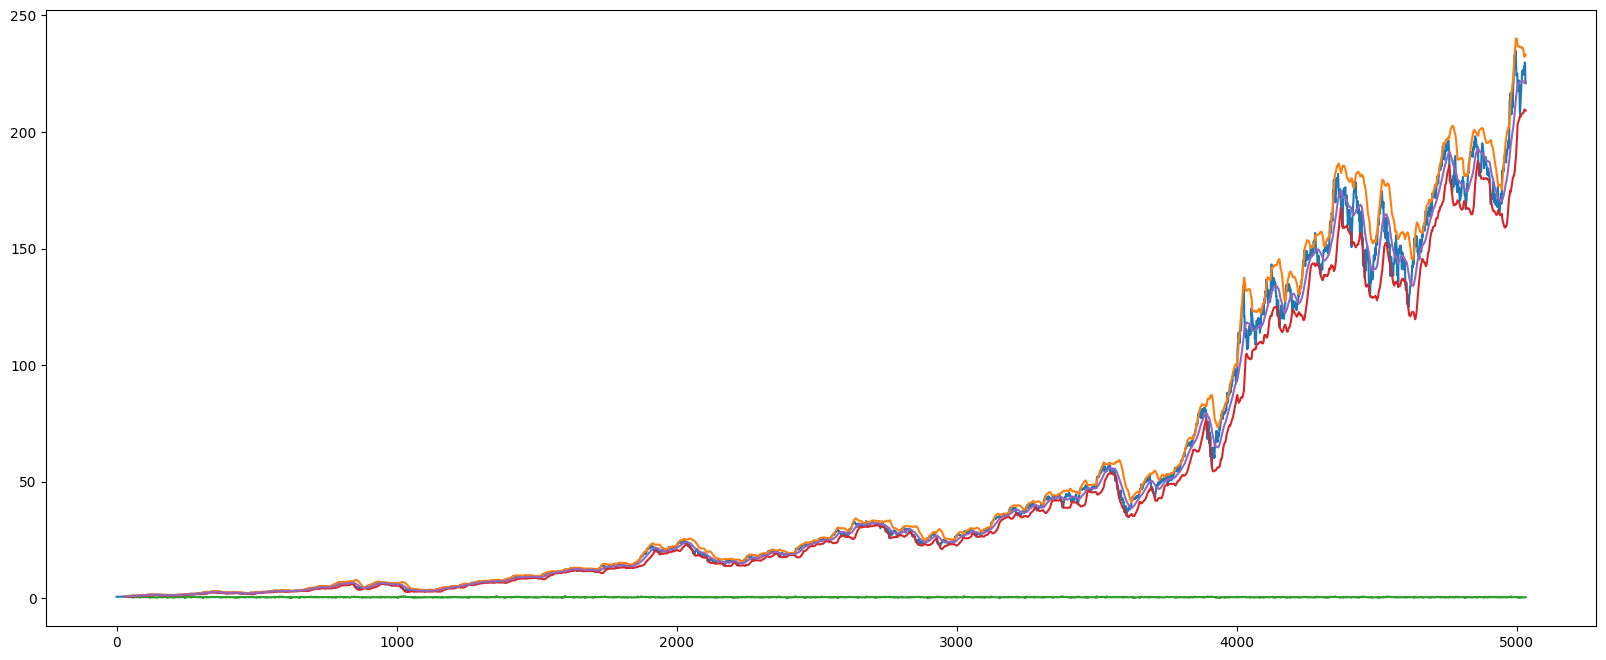

In [44]:
# More Graphs
plt.figure(figsize=(20, 8))
plt.plot(df["close"])
# plt.plot(df["close_bollinger_upper_7"])
# plt.plot(df["close_bollinger_upper_14"])
plt.plot(df["close_bollinger_upper_30"])
# plt.plot(df["close_bollinger_lower_7"])
# plt.plot(df["close_bollinger_lower_14"])


plt.plot(df["rsi_30"])
plt.plot(df["close_bollinger_lower_30"])
plt.plot(df["close_rolling_mean_30"])

# plt.plot(df["close_fib_0.382"])
plt.plot(df["close_fib_0.618"])


plt.title("Close Price")
plt.legend(["Close", "Upper 7", "Upper 14", "Upper 30", "Lower 7", "Lower 14", "Lower 30"])
plt.show()


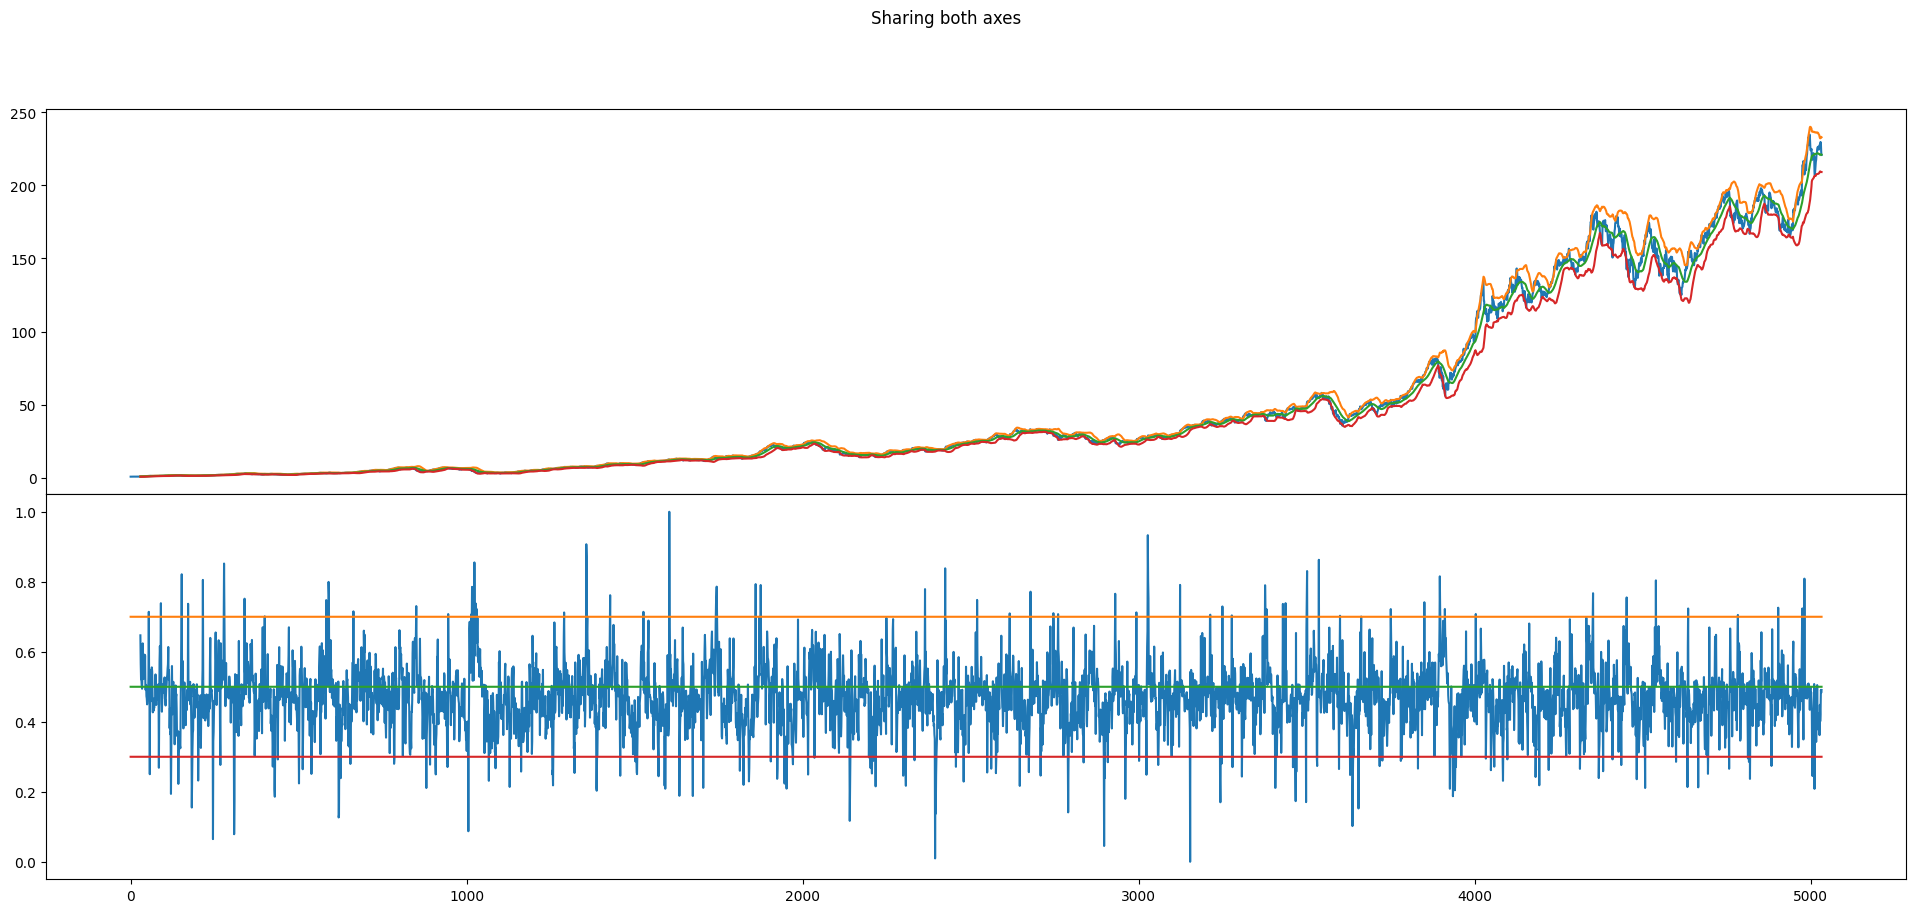

In [ ]:
fig = plt.figure(figsize=(24, 10))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle('Sharing both axes')

# df = df.iloc[-60:]


axs[0].plot(df["close"])
axs[0].plot(df["close_bollinger_upper_30"])
axs[0].plot(df["close_rolling_mean_30"])
axs[0].plot(df["close_bollinger_lower_30"])

axs[1].plot(df["rsi_30"])
axs[1].plot(df["line_0.7"])
axs[1].plot(df["line_0.5"])
axs[1].plot(df["line_0.3"])

In [ ]:
# df.set_index("date", inplace=True)

In [ ]:
df.filter(like="_fib_")

,open_fib_0.236,open_fib_0.382,open_fib_0.618,open_fib_1.0,close_fib_0.236,close_fib_0.382,close_fib_0.618,close_fib_1.0,high_fib_0.236,high_fib_0.382,high_fib_0.618,high_fib_1.0,low_fib_0.236,low_fib_0.382,low_fib_0.618,low_fib_1.0,volume_fib_0.236,volume_fib_0.382,volume_fib_0.618,volume_fib_1.0
0,0.642204,0.639701,0.635656,0.629107,0.642204,0.639701,0.635656,0.629107,0.642204,0.639701,0.635656,0.629107,0.642204,0.639701,0.635656,0.629107,0.642204,0.639701,0.635656,0.629107
1,0.649285,0.646965,0.643214,0.637143,0.649285,0.646965,0.643214,0.637143,0.649285,0.646965,0.643214,0.637143,0.649285,0.646965,0.643214,0.637143,0.649285,0.646965,0.643214,0.637143
2,0.643915,0.641256,0.636958,0.630000,0.643915,0.641256,0.636958,0.630000,0.643915,0.641256,0.636958,0.630000,0.643915,0.641256,0.636958,0.630000,0.643915,0.641256,0.636958,0.630000
3,0.643719,0.641712,0.638467,0.633214,0.643719,0.641712,0.638467,0.633214,0.643719,0.641712,0.638467,0.633214,0.643719,0.641712,0.638467,0.633214,0.643719,0.641712,0.638467,0.633214
4,0.640946,0.638991,0.635830,0.630714,0.640946,0.638991,0.635830,0.630714,0.640946,0.638991,0.635830,0.630714,0.640946,0.638991,0.635830,0.630714,0.640946,0.638991,0.635830,0.630714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,228.873519,228.263238,227.276756,225.679993,228.873519,228.263238,227.276756,225.679993,228.873519,228.263238,227.276756,225.679993,228.873519,228.263238,227.276756,225.679993,228.873519,228.263238,227.276756,225.679993
5029,231.966560,231.376721,230.423282,228.880005,231.966560,231.376721,230.423282,228.880005,231.966560,231.376721,230.423282,228.880005,231.966560,231.376721,230.423282,228.880005,231.966560,231.376721,230.423282,228.880005
5030,229.710874,229.284555,228.595435,227.479996,229.710874,229.284555,228.595435,227.479996,229.710874,229.284555,228.595435,227.479996,229.710874,229.284555,228.595435,227.479996,229.710874,229.284555,228.595435,227.479996
5031,227.152120,226.008939,224.161059,221.169998,227.152120,226.008939,224.161059,221.169998,227.152120,226.008939,224.161059,221.169998,227.152120,226.008939,224.161059,221.169998,227.152120,226.008939,224.161059,221.169998


In [ ]:
import yfinance as yf
import pandas as pd


import plotly.graph_objects as go

# axs[0].plot(df["close"])
# axs[0].plot(df["close_bollinger_upper_30"])
# axs[0].plot(df["close_rolling_mean_30"])
# axs[0].plot(df["close_bollinger_lower_30"])

# only take the last 365 days
df = df.iloc[-365:]

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df['date'],
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'],
            name='close candlestick'
        ),
        go.Scatter(
            x=df['date'],
            y=df['close'],
            mode='lines',
            line=go.scatter.Line(color='red'),
            name='close'
        ),
        go.Scatter(
            x=df['date'],
            y=df['close_rolling_mean_30'],
            mode='lines',
            line=go.scatter.Line(color='green'),
            name='MA 30'
        ),
        # go.Scatter(
        #     x=df['date'],
        #     y=df['close_bollinger_upper_30'],
        #     mode='lines',
        #     line=go.scatter.Line(color='blue'),
        #     name='Upper 30'
        # ),
        # go.Scatter(
        #     x=df['date'],
        #     y=df['close_bollinger_lower_30'],
        #     mode='lines',
        #     line=go.scatter.Line(color='blue'),
        #     name='Lower 30'
        # ),


        go.Scatter(
            x=df['date'],
            y=df['macd_12_26'],
            mode='lines',
            line=go.scatter.Line(color='yellow'),
            name='macd_12_26'
        ),
        go.Scatter(
            x=df['date'],
            y=df['macd_hist_12_26_9'],
            mode='lines',
            line=go.scatter.Line(color='purple'),
            name='macd_hist_12_26_9'
        ),
        # go.Scatter(
        #     x=df['date'],
        #     y=df['lead_1_30'],
        #     mode='lines',
        #     line=go.scatter.Line(color='orange'),
        #     name='lead_1_30'
        # ),
        # go.Scatter(
        #     x=df['date'],
        #     y=df['lead_2_30'],
        #     mode='lines',
        #     line=go.scatter.Line(color='orange'),
        #     name='lead_2_30'
        # ),

    # data[f"short_ema_{short_window}"] = data[column].ewm(span=short_window, adjust=False).mean()
    # data[f"long_ema_{long_window}"] = data[column].ewm(span=long_window, adjust=False).mean()
    # data[f"macd_{short_window}_{long_window}"] = data[f"short_ema_{short_window}"] - data[f"long_ema_{long_window}"]
    # data[f"signal_{signal_window}"] = data[f"macd_{short_window}_{
    #     long_window}"].ewm(span=signal_window, adjust=False).mean()
    # data[f"macd_hist_{short_window}_{long_window}_{signal_window}"] = data[f"macd_{
    #     short_window}_{long_window}"] - data[f"signal_{signal_window}"]


    ]
)

fig.update_layout(
    xaxis_rangeslider_visible=True,
    autosize=False,
    margin=dict(l=20, r=20, t=20, b=20),
    width=1600,
    height=800,
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
import yfinance as yf
import pandas as pd


import plotly.graph_objects as go
from plotly.subplots import make_subplots


# only take the last 365 days
df = df.iloc[-365:]

fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)


fig.append_trace(
    go.Candlestick(
        x=df['date'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='close candlestick'
    ),
    row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=df['date'],
        y=df['close'],
        mode='lines',
        line=go.scatter.Line(color='red'),
        name='close'
    ),

    row=1, col=1
)
fig.append_trace(
    go.Scatter(
        x=df['date'],
        y=df['close_rolling_mean_30'],
        mode='lines',
        line=go.scatter.Line(color='green'),
        name='MA 30'
    ),
    row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=df['date'],
        y=df['signal_9'],
        mode='lines',
        line=go.scatter.Line(color='green'),
        name='MA Signal'
    ),
    row=1, col=1
)

# close_bollinger_upper_30
fig.append_trace(
    go.Scatter(
        x=df['date'],
        y=df['close_bollinger_upper_30'],
        mode='lines',
        line=go.scatter.Line(color='blue'),
        name='Upper 30'
    ),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(
        x=df['date'],
        y=df['close_bollinger_lower_30'],
        mode='lines',
        line=go.scatter.Line(color='blue'),
        name='Lower 30'
    ),
    row=1, col=1
)




# fig.append_trace(
#     go.Scatter(
#         x=df['date'],
#         y=df['rsi_30'],
#         mode='lines',
#         line=go.scatter.Line(color='green'),
#         name='rsi_30'
#     ),
#     row=2, col=1,
# )



# fig.append_trace(
#     go.Scatter(
#         x=df['date'],
#         y=df['short_ema_50'],
#         mode='lines',
#         line=go.scatter.Line(color='red'),
#         name='short_ema_50'
#     ),
#     row=3, col=1,
# )
# fig.append_trace(
#     go.Scatter(
#         x=df['date'],
#         y=df['long_ema_200'],
#         mode='lines',
#         line=go.scatter.Line(color='black'),
#         name='long_ema_200'
#     ),
#     row=3, col=1,
# )

# fig.append_trace(
#     go.Scatter(
#         x=df['date'],
#         y=df['macd_hist_12_26_9'],
#         mode='lines',
#         line=go.scatter.Line(color='purple'),
#         name='macd_hist_12_26_9'
#     ),
#     row=3, col=1,
# )

# close_fib_0.236	close_fib_0.382	close_fib_0.618	close_fib_1.0

fig.update_layout(
    xaxis_rangeslider_visible=True,
    autosize=True,
    margin=dict(l=20, r=20, t=20, b=20),
    width=1600,
    height=800,
    paper_bgcolor="LightSteelBlue",
)

fig.show()

NameError: name 'df' is not defined